In [3]:
from sklearn.datasets import load_breast_cancer,load_diabetes

In [4]:
cancer=load_breast_cancer()
diabetes=load_diabetes()

In [5]:
X1=cancer.data
y1=cancer.target

X2=diabetes.data
y2=diabetes.target

In [6]:
import pandas as pd

df1=pd.DataFrame(data=cancer.data,columns=cancer.feature_names)
df1['target']=cancer.target
df2=pd.DataFrame(data=diabetes.data,columns=diabetes.feature_names)
df2['target']=diabetes.target


In [7]:
df1.sample(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
55,11.52,18.75,73.34,409.0,0.09524,0.05473,0.030360,0.02278,0.1920,0.05907,...,22.47,81.81,506.2,0.12490,0.08720,0.09076,0.06316,0.3306,0.07036,1
24,16.65,21.38,110.00,904.6,0.11210,0.14570,0.152500,0.09170,0.1995,0.06330,...,31.56,177.00,2215.0,0.18050,0.35780,0.46950,0.20950,0.3613,0.09564,0
14,13.73,22.61,93.60,578.3,0.11310,0.22930,0.212800,0.08025,0.2069,0.07682,...,32.01,108.80,697.7,0.16510,0.77250,0.69430,0.22080,0.3596,0.14310,0
350,11.66,17.07,73.70,421.0,0.07561,0.03630,0.008306,0.01162,0.1671,0.05731,...,19.74,83.61,542.5,0.09958,0.06476,0.03046,0.04262,0.2731,0.06825,1
156,17.68,20.74,117.40,963.7,0.11150,0.16650,0.185500,0.10540,0.1971,0.06166,...,25.11,132.90,1302.0,0.14180,0.34980,0.35830,0.15150,0.2463,0.07738,0


In [8]:
df1.shape

(569, 31)

In [9]:
df2.sample(5)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
202,0.081666,0.050680,0.001339,0.035644,0.126395,0.091065,0.019187,0.034309,0.084492,-0.030072,196.0
271,0.038076,0.050680,0.008883,0.042529,-0.042848,-0.021042,-0.039719,-0.002592,-0.018114,0.007207,127.0
312,-0.074533,-0.044642,-0.023451,-0.005670,-0.020832,-0.014153,0.015505,-0.039493,-0.038460,-0.030072,144.0
287,0.045341,-0.044642,-0.006206,-0.015999,0.125019,0.125198,0.019187,0.034309,0.032432,-0.005220,219.0
251,-0.052738,0.050680,0.098342,0.087287,0.060349,0.048790,-0.058127,0.108111,0.084492,0.040343,243.0


Linear regresssion

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [11]:
model=LinearRegression()

In [12]:
X1_train,X1_test,y1_train,y1_test=train_test_split(X1,y1,random_state=42,test_size=0.3)

In [13]:
model.fit(X1_train,y1_train)

LinearRegression()

In [14]:
y1_pred=model.predict(X1_test)

In [15]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [16]:
print(f"MAE :{mean_absolute_error(y1_test,y1_pred)}")
print(f"MSE :{mean_squared_error(y1_test,y1_pred)}")
print(f"r2 score :{r2_score(y1_test,y1_pred)}")

MAE :0.20007348217357568
MSE :0.06728376859363167
r2 score :0.7108399944964163


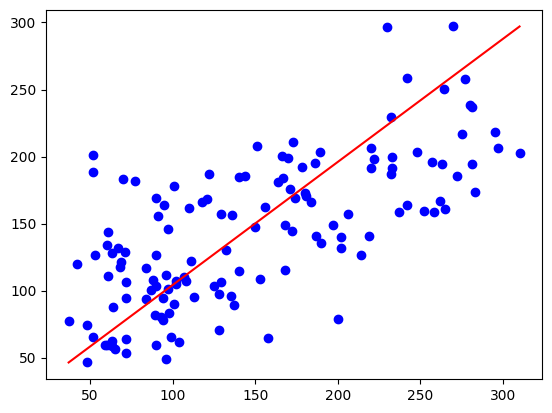

In [33]:
import matplotlib.pyplot as plt

plt.scatter(y1_test,y1_pred,c='b')
plt.plot([y1_test.min(),y1_test.max()],[y1_pred.min(),y1_pred.max()],c='r')

stochastic gradient descent

In [34]:
from sklearn.linear_model import SGDRegressor

reg=SGDRegressor(max_iter=1000,learning_rate='adaptive',eta0=0.01)

In [35]:
reg.fit(X1_train,y1_train)

SGDRegressor(learning_rate='adaptive')

In [36]:
reg_pred=reg.predict(X1_test)

In [37]:
print(f"MAE :{mean_absolute_error(y1_test,reg_pred)}")
print(f"MSE :{mean_squared_error(y1_test,reg_pred)}")
print(f"r2 score :{r2_score(y1_test,reg_pred)}")

MAE :41.89224560493792
MSE :2823.9885227004147
r2 score :0.4768752269667107


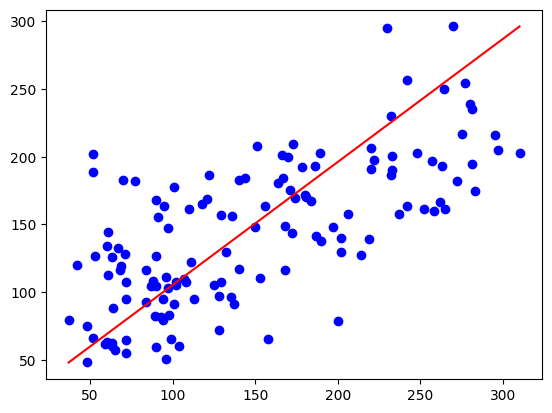

In [32]:


plt.scatter(y1_test,reg_pred,c='b')
plt.plot([y1_test.min(),y1_test.max()],[reg_pred.min(),reg_pred.max()],c='r')


mini batch gradient descent

MAE: 41.97
MSE: 2831.72
R²: 0.48


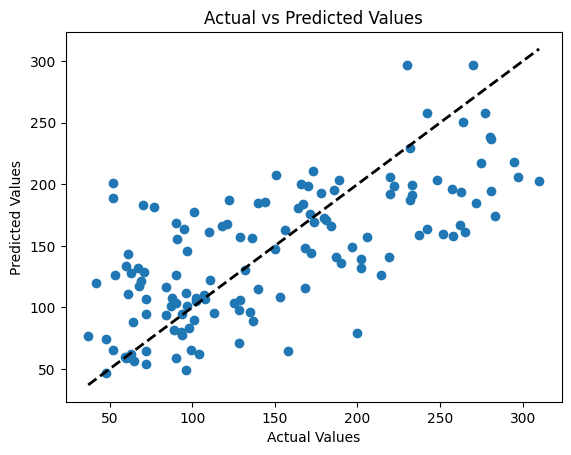

In [21]:
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the diabetes dataset
diabetes = load_diabetes()
X1 = diabetes.data  # Features
y1 = diabetes.target  # Target variable

# Split the data into training and testing sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=42)

# Normalize the features
scaler = StandardScaler()
X1_train = scaler.fit_transform(X1_train)
X1_test = scaler.transform(X1_test)

# Set parameters for mini-batch gradient descent
batch_size = 20
n_epochs = 50
n_iterations = int(np.ceil(X1_train.shape[0] / batch_size))

# Initialize the SGD regressor
sgd_regressor = SGDRegressor(max_iter=1, tol=None, warm_start=True, random_state=42)

# Perform mini-batch gradient descent
for epoch in range(n_epochs):
    shuffled_indices = np.random.permutation(X1_train.shape[0])
    X1_train_shuffled = X1_train[shuffled_indices]
    y1_train_shuffled = y1_train[shuffled_indices]
    
    for i in range(0, X1_train.shape[0], batch_size):
        X1_batch = X1_train_shuffled[i:i+batch_size]
        y1_batch = y1_train_shuffled[i:i+batch_size]
        sgd_regressor.partial_fit(X1_batch, y1_batch)

# Make predictions on the test set
y1_pred = sgd_regressor.predict(X1_test)

# Calculate and print the evaluation metrics
mae = mean_absolute_error(y1_test, y1_pred)
mse = mean_squared_error(y1_test, y1_pred)
r2 = r2_score(y1_test, y1_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R²: {r2:.2f}")

# Optional: Plot actual vs predicted values
plt.scatter(y1_test, y1_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.plot([y1_test.min(), y1_test.max()], [y1_test.min(), y1_test.max()], 'k--', lw=2)
plt.show()
